In [ ]:
#weather
!gdown 1jRsuCV9oa6I2jQTWMKRYahXBttkuxqDr

Downloading...
From (original): https://drive.google.com/uc?id=1jRsuCV9oa6I2jQTWMKRYahXBttkuxqDr
From (redirected): https://drive.google.com/uc?id=1jRsuCV9oa6I2jQTWMKRYahXBttkuxqDr&confirm=t&uuid=82c9b914-580b-4bb4-948e-a9c40b1c7cae
To: /content/processing_date_12_9_2567_CMU.csv
100% 166M/166M [00:02<00:00, 58.8MB/s]


In [ ]:
import pandas as pd
Datawithoutbill_df = pd.read_csv('/content/processing_date_12_9_2567_CMU.csv')
Datawithoutbill_df

,CONSIGNEE_PROVINCE,Temperature,Humidity,Wind_Speed,Condition,Dew_Point,Wind,Wind_Gust,Pressure,Precip,...,is_halloween,is_christmas,is_new_year,month,day,day_of_week,day_of_year,quarter,is_weekend,ITEM_DESC_CLEAN_labelencoding
0,71,78.437500,57.541667,3.416667,0,60.395833,8,0.0,28.922500,0.0,...,False,False,False,2,13,1,44,1,False,11799
1,71,78.437500,57.541667,3.416667,0,60.395833,8,0.0,28.922500,0.0,...,False,False,False,2,13,1,44,1,False,75875
2,71,78.437500,57.541667,3.416667,0,60.395833,8,0.0,28.922500,0.0,...,False,False,False,2,13,1,44,1,False,11799
3,71,78.437500,57.541667,3.416667,0,60.395833,8,0.0,28.922500,0.0,...,False,False,False,2,13,1,44,1,False,68124
4,71,78.437500,57.541667,3.416667,0,60.395833,8,0.0,28.922500,0.0,...,False,False,False,2,13,1,44,1,False,68124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856493,65,82.500000,72.812500,5.875000,5,72.395833,3,0.0,28.796042,0.0,...,False,False,False,5,11,5,132,2,True,50258
856494,50,82.500000,72.812500,5.875000,5,72.395833,3,0.0,28.796042,0.0,...,False,False,False,5,11,5,132,2,True,48176
856495,25,70.583333,59.625000,2.625000,0,54.041667,8,0.0,28.874167,0.0,...,False,False,False,1,22,0,22,1,False,49592
856496,55,75.979167,58.145833,2.270833,0,58.416667,8,0.0,28.789375,0.0,...,False,False,False,2,8,3,39,1,False,49147


In [ ]:
Datawithoutbill_df = Datawithoutbill_df.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df.drop(columns=["QTY"])
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#xgboost + all feature

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)

y_pred = xgb_model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

[0]	validation_0-rmse:17.89361
[10]	validation_0-rmse:15.62936
[20]	validation_0-rmse:15.01250
[30]	validation_0-rmse:14.69228
[40]	validation_0-rmse:14.39771
[50]	validation_0-rmse:14.18310
[60]	validation_0-rmse:14.08300
[70]	validation_0-rmse:13.99332
[80]	validation_0-rmse:13.93353
[90]	validation_0-rmse:13.89160
[100]	validation_0-rmse:13.83810
[110]	validation_0-rmse:13.78432
[120]	validation_0-rmse:13.75874
[130]	validation_0-rmse:13.69944
[140]	validation_0-rmse:13.65754
[150]	validation_0-rmse:13.63008
[160]	validation_0-rmse:13.60241
[170]	validation_0-rmse:13.59172
[180]	validation_0-rmse:13.57867
[190]	validation_0-rmse:13.55526
[200]	validation_0-rmse:13.53607
[210]	validation_0-rmse:13.50698
[220]	validation_0-rmse:13.48375
[230]	validation_0-rmse:13.45689
[240]	validation_0-rmse:13.44405
[250]	validation_0-rmse:13.42119
[260]	validation_0-rmse:13.41125
[270]	validation_0-rmse:13.39454
[280]	validation_0-rmse:13.38823
[290]	validation_0-rmse:13.37660
[300]	validation_0-rm

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)
r2 = xgb_model.score(X_val, y_val)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 13.24
MSE: 175.18
R2: 0.48


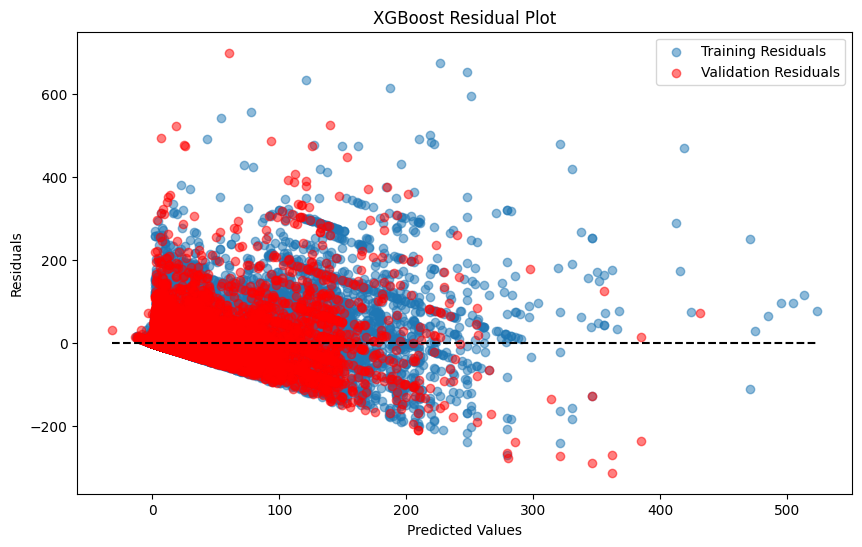

In [ ]:
train_preds = xgb_model.predict(X_train)
val_preds = xgb_model.predict(X_val)

train_residuals = y_train - train_preds
val_residuals = y_val - val_preds

def residual_plot(y_train, train_preds, y_val, val_preds, title="Residual Plot"):
    plt.figure(figsize=(10, 6))

    plt.scatter(train_preds, y_train - train_preds, label='Training Residuals', alpha=0.5)

    plt.scatter(val_preds, y_val - val_preds, label='Validation Residuals', alpha=0.5, color='red')

    plt.hlines(0, min(train_preds.min(), val_preds.min()), max(train_preds.max(), val_preds.max()), colors='black', linestyles='dashed')

    plt.title(title)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

residual_plot(y_train, train_preds,
              y_val, val_preds,
              title="XGBoost Residual Plot")


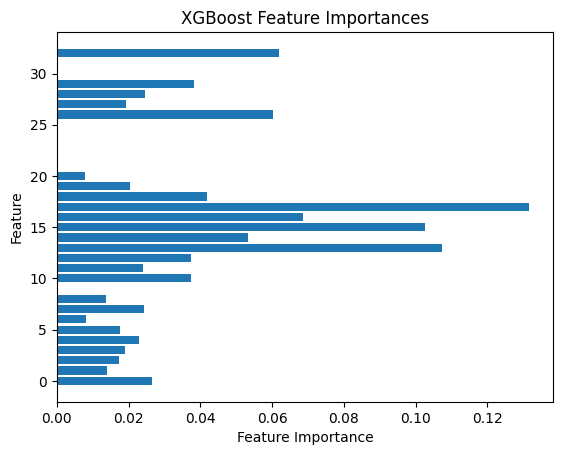

In [ ]:
feature_importances = xgb_model.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importances")
plt.show()

In [ ]:
feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                          Feature  Importance
17                      DEST_CODE    0.131722
13                      ITEM_CODE    0.107322
15                      UNIT_NAME    0.102684
16                       REG_Code    0.068723
32  ITEM_DESC_CLEAN_labelencoding    0.061933
26                          month    0.060151
14                ITEM_NAMEในระบบ    0.053272
18                       Category    0.041827
29                    day_of_year    0.038136
10               CONSIGNEE_TAMBON    0.037280
12              CONSIGNEE_ZIPCODE    0.037269
0              CONSIGNEE_PROVINCE    0.026545
28                    day_of_week    0.024651
7                       Wind_Gust    0.024198
11               CONSIGNEE_AMPHUR    0.023995
4                       Condition    0.022887
19                      is_payday    0.020455
27                            day    0.019362
3                      Wind_Speed    0.018969
5                       Dew_Point    0.017491
2                        Humidity 

In [ ]:
importance_df

,Feature,Importance
17,DEST_CODE,0.131722
13,ITEM_CODE,0.107322
15,UNIT_NAME,0.102684
16,REG_Code,0.068723
32,ITEM_DESC_CLEAN_labelencoding,0.061933
26,month,0.060151
14,ITEM_NAMEในระบบ,0.053272
18,Category,0.041827
29,day_of_year,0.038136
10,CONSIGNEE_TAMBON,0.037280


In [ ]:
feature_names = X_train.columns.tolist()
print("Feature Names:", feature_names)

Feature Names: ['CONSIGNEE_PROVINCE', 'Temperature', 'Humidity', 'Wind_Speed', 'Condition', 'Dew_Point', 'Wind', 'Wind_Gust', 'Pressure', 'Precip', 'CONSIGNEE_TAMBON', 'CONSIGNEE_AMPHUR', 'CONSIGNEE_ZIPCODE', 'ITEM_CODE', 'ITEM_NAMEในระบบ', 'UNIT_NAME', 'REG_Code', 'DEST_CODE', 'Category', 'is_payday', 'is_end_of_month', 'is_significant_day', 'is_black_friday', 'is_halloween', 'is_christmas', 'is_new_year', 'month', 'day', 'day_of_week', 'day_of_year', 'quarter', 'is_weekend', 'ITEM_DESC_CLEAN_labelencoding']


#optuna + xgboost

In [ ]:
!pip install -q optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
import optuna
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0),
        'eval_metric': 'rmse'
    }

    model = xgb.XGBRegressor(**params, random_state=42)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False,
    )

    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best parameters: ", study.best_params)

best_params = study.best_params
xgb_model = xgb.XGBRegressor(**best_params, random_state=42)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)

y_pred = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Best RMSE: {rmse}")

[I 2024-09-14 09:23:02,157] A new study created in memory with name: no-name-7303ed6e-06b5-48b1-8315-ae9bf7c25bf2
[I 2024-09-14 09:24:17,112] Trial 0 finished with value: 13.743588170606106 and parameters: {'n_estimators': 345, 'learning_rate': 0.24221812756510813, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.704833375903668, 'colsample_bytree': 0.5901893380860188, 'gamma': 0.7117288839458713, 'lambda': 1.9581995648017914, 'alpha': 5.438485777204113}. Best is trial 0 with value: 13.743588170606106.
[I 2024-09-14 09:28:38,218] Trial 1 finished with value: 13.811705547179782 and parameters: {'n_estimators': 1671, 'learning_rate': 0.2847057043483541, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.6852263884023538, 'colsample_bytree': 0.7716876804304654, 'gamma': 0.0655619622878495, 'lambda': 8.785469716947008, 'alpha': 1.7472530415309309}. Best is trial 0 with value: 13.743588170606106.
[I 2024-09-14 09:31:37,477] Trial 2 finished with value: 13.942063073011923 and paramet

Best parameters:  {'n_estimators': 1726, 'learning_rate': 0.13310461698711107, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.780452726854035, 'colsample_bytree': 0.7995545057930185, 'gamma': 4.184203871296922, 'lambda': 4.213747950836902, 'alpha': 8.679664880417572}
[0]	validation_0-rmse:17.77154
[10]	validation_0-rmse:15.56547
[20]	validation_0-rmse:15.05371
[30]	validation_0-rmse:14.73941
[40]	validation_0-rmse:14.50380
[50]	validation_0-rmse:14.38122
[60]	validation_0-rmse:14.29637
[70]	validation_0-rmse:14.23486
[80]	validation_0-rmse:14.17032
[90]	validation_0-rmse:14.09783
[100]	validation_0-rmse:14.06179
[110]	validation_0-rmse:14.01760
[120]	validation_0-rmse:13.97544
[130]	validation_0-rmse:13.96682
[140]	validation_0-rmse:13.93490
[150]	validation_0-rmse:13.91652
[160]	validation_0-rmse:13.89631
[170]	validation_0-rmse:13.88093
[180]	validation_0-rmse:13.85744
[190]	validation_0-rmse:13.84497
[200]	validation_0-rmse:13.82651
[210]	validation_0-rmse:13.82424
[220]	vali

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)
r2 = xgb_model.score(X_val, y_val)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 13.60
MSE: 184.92
R2: 0.46


#xgboost + drop importance = 0

In [ ]:
feature = ['CONSIGNEE_PROVINCE', 'Temperature', 'Humidity', 'Wind_Speed', 'Condition', 'Dew_Point', 'Wind', 'Wind_Gust', 'Pressure', 'CONSIGNEE_TAMBON', 'CONSIGNEE_AMPHUR', 'CONSIGNEE_ZIPCODE', 'ITEM_CODE', 'ITEM_NAMEในระบบ', 'UNIT_NAME', 'REG_Code', 'DEST_CODE', 'Category', 'is_payday', 'month', 'day', 'day_of_week', 'day_of_year','ITEM_DESC_CLEAN_labelencoding']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)

y_pred = xgb_model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

[0]	validation_0-rmse:17.89361
[10]	validation_0-rmse:15.62936
[20]	validation_0-rmse:15.01250
[30]	validation_0-rmse:14.69228
[40]	validation_0-rmse:14.39771
[50]	validation_0-rmse:14.18310
[60]	validation_0-rmse:14.08300
[70]	validation_0-rmse:13.99332
[80]	validation_0-rmse:13.93353
[90]	validation_0-rmse:13.89160
[100]	validation_0-rmse:13.83810
[110]	validation_0-rmse:13.78432
[120]	validation_0-rmse:13.75874
[130]	validation_0-rmse:13.69944
[140]	validation_0-rmse:13.65754
[150]	validation_0-rmse:13.63008
[160]	validation_0-rmse:13.60241
[170]	validation_0-rmse:13.59172
[180]	validation_0-rmse:13.57867
[190]	validation_0-rmse:13.55526
[200]	validation_0-rmse:13.53607
[210]	validation_0-rmse:13.50400
[220]	validation_0-rmse:13.48233
[230]	validation_0-rmse:13.46755
[240]	validation_0-rmse:13.44895
[250]	validation_0-rmse:13.44896
[260]	validation_0-rmse:13.44781
[270]	validation_0-rmse:13.43384
[280]	validation_0-rmse:13.41418
[290]	validation_0-rmse:13.40287
[300]	validation_0-rm

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)
r2 = xgb_model.score(X_val, y_val)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 13.26
MSE: 175.82
R2: 0.48


#xgboost + 10 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON','CONSIGNEE_ZIPCODE','Category','CONSIGNEE_PROVINCE']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)

y_pred = xgb_model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

[0]	validation_0-rmse:17.89328
[10]	validation_0-rmse:15.59159
[20]	validation_0-rmse:14.97338
[30]	validation_0-rmse:14.60930
[40]	validation_0-rmse:14.30789
[50]	validation_0-rmse:14.09110
[60]	validation_0-rmse:13.99452
[70]	validation_0-rmse:13.91318
[80]	validation_0-rmse:13.84343
[90]	validation_0-rmse:13.76031
[100]	validation_0-rmse:13.72296
[110]	validation_0-rmse:13.67585
[120]	validation_0-rmse:13.60866
[130]	validation_0-rmse:13.55463
[140]	validation_0-rmse:13.50584
[150]	validation_0-rmse:13.47648
[160]	validation_0-rmse:13.45167
[170]	validation_0-rmse:13.42823
[180]	validation_0-rmse:13.40600
[190]	validation_0-rmse:13.37901
[200]	validation_0-rmse:13.35400
[210]	validation_0-rmse:13.32895
[220]	validation_0-rmse:13.30722
[230]	validation_0-rmse:13.28434
[240]	validation_0-rmse:13.27217
[250]	validation_0-rmse:13.25182
[260]	validation_0-rmse:13.23628
[270]	validation_0-rmse:13.21631
[280]	validation_0-rmse:13.18907
[290]	validation_0-rmse:13.17920
[300]	validation_0-rm

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)
r2 = xgb_model.score(X_val, y_val)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 12.96
MSE: 168.00
R2: 0.51


#xgboost + 20 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON','CONSIGNEE_ZIPCODE','Category','CONSIGNEE_PROVINCE','day_of_year','month','CONSIGNEE_AMPHUR','Wind_Gust','is_payday','day_of_week','Condition','Wind_Speed','Dew_Point','Humidity','day']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)

y_pred = xgb_model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

[0]	validation_0-rmse:17.89342
[10]	validation_0-rmse:15.63219
[20]	validation_0-rmse:15.01553
[30]	validation_0-rmse:14.70126
[40]	validation_0-rmse:14.34501
[50]	validation_0-rmse:14.16828
[60]	validation_0-rmse:14.08206
[70]	validation_0-rmse:13.98927
[80]	validation_0-rmse:13.88463
[90]	validation_0-rmse:13.83103
[100]	validation_0-rmse:13.78785
[110]	validation_0-rmse:13.75048
[120]	validation_0-rmse:13.71707
[130]	validation_0-rmse:13.65320
[140]	validation_0-rmse:13.62258
[150]	validation_0-rmse:13.60078
[160]	validation_0-rmse:13.57286
[170]	validation_0-rmse:13.55225
[180]	validation_0-rmse:13.53184
[190]	validation_0-rmse:13.51546
[200]	validation_0-rmse:13.48351
[210]	validation_0-rmse:13.47678
[220]	validation_0-rmse:13.46737
[230]	validation_0-rmse:13.45445
[240]	validation_0-rmse:13.43289
[250]	validation_0-rmse:13.41218
[260]	validation_0-rmse:13.37926
[270]	validation_0-rmse:13.36884
[280]	validation_0-rmse:13.35455
[290]	validation_0-rmse:13.34882
[300]	validation_0-rm

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)
r2 = xgb_model.score(X_val, y_val)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 13.18
MSE: 173.68
R2: 0.49


#xgboost + 5 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)

y_pred = xgb_model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

[0]	validation_0-rmse:17.90764
[10]	validation_0-rmse:15.62096
[20]	validation_0-rmse:15.02182
[30]	validation_0-rmse:14.73943
[40]	validation_0-rmse:14.53775
[50]	validation_0-rmse:14.35572
[60]	validation_0-rmse:14.20740
[70]	validation_0-rmse:14.12604
[80]	validation_0-rmse:14.07743
[90]	validation_0-rmse:14.02357
[100]	validation_0-rmse:13.94200
[110]	validation_0-rmse:13.89129
[120]	validation_0-rmse:13.85060
[130]	validation_0-rmse:13.81149
[140]	validation_0-rmse:13.77720
[150]	validation_0-rmse:13.74931
[160]	validation_0-rmse:13.73272
[170]	validation_0-rmse:13.70298
[180]	validation_0-rmse:13.67874
[190]	validation_0-rmse:13.66205
[200]	validation_0-rmse:13.64018
[210]	validation_0-rmse:13.62087
[220]	validation_0-rmse:13.60484
[230]	validation_0-rmse:13.59758
[240]	validation_0-rmse:13.59381
[250]	validation_0-rmse:13.58507
[260]	validation_0-rmse:13.57858
[270]	validation_0-rmse:13.57229
[280]	validation_0-rmse:13.56243
[290]	validation_0-rmse:13.55335
[300]	validation_0-rm

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)
r2 = xgb_model.score(X_val, y_val)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 13.40
MSE: 179.43
R2: 0.47


#xgboost + 7 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1)

xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=10)

y_pred = xgb_model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")


[0]	validation_0-rmse:17.89649
[10]	validation_0-rmse:15.58465
[20]	validation_0-rmse:14.97744
[30]	validation_0-rmse:14.63763
[40]	validation_0-rmse:14.39366
[50]	validation_0-rmse:14.20502
[60]	validation_0-rmse:14.09102
[70]	validation_0-rmse:14.01777
[80]	validation_0-rmse:13.95660
[90]	validation_0-rmse:13.88350
[100]	validation_0-rmse:13.83350
[110]	validation_0-rmse:13.76862
[120]	validation_0-rmse:13.70981
[130]	validation_0-rmse:13.67412
[140]	validation_0-rmse:13.62347
[150]	validation_0-rmse:13.59408
[160]	validation_0-rmse:13.56478
[170]	validation_0-rmse:13.54181
[180]	validation_0-rmse:13.51264
[190]	validation_0-rmse:13.48813
[200]	validation_0-rmse:13.45925
[210]	validation_0-rmse:13.43658
[220]	validation_0-rmse:13.42537
[230]	validation_0-rmse:13.41393
[240]	validation_0-rmse:13.38917
[250]	validation_0-rmse:13.36868
[260]	validation_0-rmse:13.35272
[270]	validation_0-rmse:13.34206
[280]	validation_0-rmse:13.32123
[290]	validation_0-rmse:13.31290
[300]	validation_0-rm

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)
r2 = xgb_model.score(X_val, y_val)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 13.06
MSE: 170.57
R2: 0.50


In [ ]:
'''
xgboost + all feature + lr=0.1 + n_estimators=500
Testing performance
RMSE: 13.24
MSE: 175.18
R2: 0.48

xgboost + optuna +all feature + n_trials=10
Testing performance
RMSE: 13.60
MSE: 184.92
R2: 0.46

xgboost + all feature + lr=0.1 + n_estimators=500 + drop feature importance = 0
Testing performance
RMSE: 13.26
MSE: 175.82
R2: 0.48

xgboost + all feature + lr=0.1 + n_estimators=500 + 10 feature
Testing performance
RMSE: 12.96
MSE: 168.00
R2: 0.51

xgboost + all feature + lr=0.1 + n_estimators=500 + 20 feature
Testing performance
RMSE: 13.18
MSE: 173.68
R2: 0.49

xgboost + all feature + lr=0.1 + n_estimators=500 + 5 feature
Testing performance
RMSE: 13.40
MSE: 179.43
R2: 0.47

xgboost + all feature + lr=0.1 + n_estimators=500 + 7 feature
Testing performance
RMSE: 13.06
MSE: 170.57
R2: 0.50
'''

'\nxgboost + all feature + lr=0.1 + n_estimators=500\nTesting performance\nRMSE: 13.24\nMSE: 175.18\nR2: 0.48\n\nxgboost + optuna +all feature + n_trials=10\n\n'

#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#catboost + all feature

In [ ]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df.drop(columns=["QTY"])
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
model = CatBoostRegressor(iterations=500,
                          learning_rate=0.1,
                          depth=6,
                          verbose=100)

In [ ]:
model.fit(X_train, y_train,
          eval_set=(X_val, y_val),
          cat_features=[],
          early_stopping_rounds=100)

0:	learn: 17.8559581	test: 18.0503880	best: 18.0503880 (0)	total: 374ms	remaining: 3m 6s
100:	learn: 14.1005860	test: 14.4664931	best: 14.4664931 (100)	total: 16.2s	remaining: 1m 3s
200:	learn: 13.6312512	test: 14.0377787	best: 14.0377787 (200)	total: 36.4s	remaining: 54.2s
300:	learn: 13.3498564	test: 13.8109878	best: 13.8109878 (300)	total: 49.9s	remaining: 33s
400:	learn: 13.1502006	test: 13.6565045	best: 13.6565045 (400)	total: 1m 6s	remaining: 16.3s
499:	learn: 12.9852839	test: 13.5356257	best: 13.5325292 (498)	total: 1m 19s	remaining: 0us

bestTest = 13.5325292
bestIteration = 498

Shrink model to first 499 iterations.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.06
MSE: 170.57


#catboost + optuna

In [ ]:
import optuna
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': False
    }

    model = CatBoostRegressor(**params, random_seed=42)

    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print("Best parameters: ", study.best_params)

best_params = study.best_params
catboost_model = CatBoostRegressor(**best_params, random_seed=42)

catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=10)

y_pred = catboost_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Best RMSE: {rmse}")


[I 2024-09-14 11:44:38,569] A new study created in memory with name: no-name-3e95eb2f-dc06-49af-ba20-7d5af72d6860
[I 2024-09-14 11:45:53,550] Trial 0 finished with value: 14.519638180308728 and parameters: {'iterations': 421, 'learning_rate': 0.0168779420989482, 'depth': 7, 'l2_leaf_reg': 7.461511701205884, 'bagging_temperature': 0.4623330760102222, 'random_strength': 0.6380209342773145, 'border_count': 151}. Best is trial 0 with value: 14.519638180308728.
[I 2024-09-14 11:48:23,180] Trial 1 finished with value: 13.326514030342564 and parameters: {'iterations': 995, 'learning_rate': 0.07195343838679233, 'depth': 7, 'l2_leaf_reg': 8.249071626032569, 'bagging_temperature': 0.9404157840356389, 'random_strength': 0.9674434816655862, 'border_count': 228}. Best is trial 1 with value: 13.326514030342564.
[I 2024-09-14 11:49:42,449] Trial 2 finished with value: 13.10750231638171 and parameters: {'iterations': 1884, 'learning_rate': 0.23184065904220494, 'depth': 8, 'l2_leaf_reg': 0.927754828179

Best parameters:  {'iterations': 1770, 'learning_rate': 0.06750639855401516, 'depth': 9, 'l2_leaf_reg': 2.7109712312044114, 'bagging_temperature': 0.23669694957111131, 'random_strength': 0.39462824357169435, 'border_count': 182}
0:	learn: 17.8926595	test: 18.0817331	best: 18.0817331 (0)	total: 164ms	remaining: 4m 49s
10:	learn: 15.8595457	test: 16.1114901	best: 16.1114901 (10)	total: 1.73s	remaining: 4m 37s
20:	learn: 15.0762207	test: 15.3482236	best: 15.3482236 (20)	total: 3.33s	remaining: 4m 37s
30:	learn: 14.7029163	test: 14.9923762	best: 14.9923762 (30)	total: 5.39s	remaining: 5m 2s
40:	learn: 14.4366050	test: 14.7273399	best: 14.7273399 (40)	total: 8.77s	remaining: 6m 10s
50:	learn: 14.2490942	test: 14.5557618	best: 14.5557618 (50)	total: 10.5s	remaining: 5m 54s
60:	learn: 14.1300403	test: 14.4546383	best: 14.4546383 (60)	total: 12.1s	remaining: 5m 39s
70:	learn: 14.0428341	test: 14.3935237	best: 14.3935237 (70)	total: 13.8s	remaining: 5m 29s
80:	learn: 13.9238138	test: 14.2845483

In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.04
MSE: 170.00


#catboost + drop importance = 0

In [ ]:
feature = ['CONSIGNEE_PROVINCE', 'Temperature', 'Humidity', 'Wind_Speed', 'Condition', 'Dew_Point', 'Wind', 'Wind_Gust', 'Pressure', 'CONSIGNEE_TAMBON', 'CONSIGNEE_AMPHUR', 'CONSIGNEE_ZIPCODE', 'ITEM_CODE', 'ITEM_NAMEในระบบ', 'UNIT_NAME', 'REG_Code', 'DEST_CODE', 'Category', 'is_payday', 'month', 'day', 'day_of_week', 'day_of_year','ITEM_DESC_CLEAN_labelencoding']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train,
          eval_set=(X_val, y_val),
          cat_features=[],
          early_stopping_rounds=100)

0:	learn: 17.8560633	test: 18.0506597	best: 18.0506597 (0)	total: 212ms	remaining: 1m 45s
100:	learn: 14.1067267	test: 14.4599542	best: 14.4599542 (100)	total: 13.6s	remaining: 53.8s
200:	learn: 13.6310548	test: 14.0277114	best: 14.0277114 (200)	total: 29.9s	remaining: 44.4s
300:	learn: 13.3636269	test: 13.8011240	best: 13.8010044 (299)	total: 48.8s	remaining: 32.3s
400:	learn: 13.1485845	test: 13.6300386	best: 13.6300386 (400)	total: 1m 4s	remaining: 16s
499:	learn: 13.0073666	test: 13.5240784	best: 13.5240784 (499)	total: 1m 27s	remaining: 0us

bestTest = 13.52407838
bestIteration = 499



In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.04
MSE: 170.00


#catboost + 10 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON','CONSIGNEE_ZIPCODE','Category','CONSIGNEE_PROVINCE']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train,
          eval_set=(X_val, y_val),
          cat_features=[],
          early_stopping_rounds=100)

0:	learn: 17.8565667	test: 18.0509945	best: 18.0509945 (0)	total: 96.5ms	remaining: 48.1s
100:	learn: 14.1228672	test: 14.4315310	best: 14.4315310 (100)	total: 11.9s	remaining: 47.1s
200:	learn: 13.6729477	test: 13.9898984	best: 13.9898984 (200)	total: 28.3s	remaining: 42s
300:	learn: 13.4369837	test: 13.7261395	best: 13.7261395 (300)	total: 52.5s	remaining: 34.7s
400:	learn: 13.2714187	test: 13.5625866	best: 13.5625866 (400)	total: 1m 5s	remaining: 16.2s
499:	learn: 13.1454708	test: 13.4378476	best: 13.4378476 (499)	total: 1m 17s	remaining: 0us

bestTest = 13.43784763
bestIteration = 499



In [ ]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.04
MSE: 170.00


#catboost + 20 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON','CONSIGNEE_ZIPCODE','Category','CONSIGNEE_PROVINCE','day_of_year','month','CONSIGNEE_AMPHUR','Wind_Gust','is_payday','day_of_week','Condition','Wind_Speed','Dew_Point','Humidity','day']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train,
          eval_set=(X_val, y_val),
          cat_features=[],
          early_stopping_rounds=100)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

0:	learn: 17.8554512	test: 18.0500419	best: 18.0500419 (0)	total: 106ms	remaining: 52.9s
100:	learn: 14.0924399	test: 14.4368556	best: 14.4368556 (100)	total: 18.1s	remaining: 1m 11s
200:	learn: 13.6338278	test: 14.0341677	best: 14.0341677 (200)	total: 37.2s	remaining: 55.4s
300:	learn: 13.3657612	test: 13.8092694	best: 13.8091096 (299)	total: 54.1s	remaining: 35.7s
400:	learn: 13.1627411	test: 13.6410397	best: 13.6410397 (400)	total: 1m 13s	remaining: 18.2s
499:	learn: 13.0122623	test: 13.5144344	best: 13.5140624 (498)	total: 1m 27s	remaining: 0us

bestTest = 13.51406243
bestIteration = 498

Shrink model to first 499 iterations.


In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.04
MSE: 170.00


#catboost + 5 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train,
          eval_set=(X_val, y_val),
          cat_features=[],
          early_stopping_rounds=100)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

0:	learn: 17.8597393	test: 18.0546021	best: 18.0546021 (0)	total: 79.8ms	remaining: 39.8s
100:	learn: 14.2529845	test: 14.5248721	best: 14.5248721 (100)	total: 15.4s	remaining: 1m
200:	learn: 13.9068845	test: 14.1644452	best: 14.1644452 (200)	total: 25.8s	remaining: 38.4s
300:	learn: 13.7377798	test: 13.9827700	best: 13.9827700 (300)	total: 38.3s	remaining: 25.3s
400:	learn: 13.6077451	test: 13.8394292	best: 13.8392898 (399)	total: 47.7s	remaining: 11.8s
499:	learn: 13.5193943	test: 13.7569095	best: 13.7569095 (499)	total: 58.8s	remaining: 0us

bestTest = 13.75690947
bestIteration = 499



In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.04
MSE: 170.00


#catboost + 7 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON']

In [ ]:
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train,
          eval_set=(X_val, y_val),
          cat_features=[],
          early_stopping_rounds=100)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

0:	learn: 17.8559018	test: 18.0503515	best: 18.0503515 (0)	total: 87.6ms	remaining: 43.7s
100:	learn: 14.1818970	test: 14.4835466	best: 14.4835466 (100)	total: 11.1s	remaining: 43.9s
200:	learn: 13.7762451	test: 14.0768170	best: 14.0768170 (200)	total: 22.8s	remaining: 33.9s
300:	learn: 13.5541933	test: 13.8259613	best: 13.8259613 (300)	total: 32.6s	remaining: 21.6s
400:	learn: 13.3919180	test: 13.6535237	best: 13.6535237 (400)	total: 43.4s	remaining: 10.7s
499:	learn: 13.2644875	test: 13.5378216	best: 13.5378216 (499)	total: 54.1s	remaining: 0us

bestTest = 13.53782161
bestIteration = 499



In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.04
MSE: 170.00


In [ ]:
'''
catboost + all feature + lr=0.1 + n_estimators=500
Testing performance
RMSE: 13.24
MSE: 175.18

catboost + optuna
Testing performance
RMSE: 13.24
MSE: 175.18

catboost + drop feature importance = 0
Testing performance
RMSE: 13.04
MSE: 170.00

catboost + 10 feature
Testing performance
RMSE: 13.04
MSE: 170.00

catboost + 20 feature
Testing performance
RMSE: 13.04
MSE: 170.00

catboost + 5 feature
Testing performance
RMSE: 13.04
MSE: 170.00

catboost + 7 feature
Testing performance
RMSE: 13.04
MSE: 170.00
'''

#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#lightgbm + all feature

In [ ]:
!pip install -q lightgbm

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df.drop(columns=["QTY"])
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(n_estimators=500, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          eval_metric='rmse')

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2656
[LightGBM] [Info] Number of data points in the train set: 685176, number of used features: 29
[LightGBM] [Info] Start training from score 5.571634


In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.05
MSE: 170.30


#lightgbm + drop importance = 0

In [ ]:
feature = ['CONSIGNEE_PROVINCE', 'Temperature', 'Humidity', 'Wind_Speed', 'Condition', 'Dew_Point', 'Wind', 'Wind_Gust', 'Pressure', 'CONSIGNEE_TAMBON', 'CONSIGNEE_AMPHUR', 'CONSIGNEE_ZIPCODE', 'ITEM_CODE', 'ITEM_NAMEในระบบ', 'UNIT_NAME', 'REG_Code', 'DEST_CODE', 'Category', 'is_payday', 'month', 'day', 'day_of_week', 'day_of_year','ITEM_DESC_CLEAN_labelencoding']

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(n_estimators=500, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          eval_metric='rmse',)

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2645
[LightGBM] [Info] Number of data points in the train set: 685176, number of used features: 24
[LightGBM] [Info] Start training from score 5.571634


In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.04
MSE: 170.07


#lightgbm + 10 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON','CONSIGNEE_ZIPCODE','Category','CONSIGNEE_PROVINCE']

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(n_estimators=500, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          eval_metric='rmse',)

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1389
[LightGBM] [Info] Number of data points in the train set: 685176, number of used features: 10
[LightGBM] [Info] Start training from score 5.571634


In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 12.84
MSE: 164.77


#lightgbm + 20 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON','CONSIGNEE_ZIPCODE','Category','CONSIGNEE_PROVINCE','day_of_year','month','CONSIGNEE_AMPHUR','Wind_Gust','is_payday','day_of_week','Condition','Wind_Speed','Dew_Point','Humidity','day']

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(n_estimators=500, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          eval_metric='rmse',)

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2290
[LightGBM] [Info] Number of data points in the train set: 685176, number of used features: 21
[LightGBM] [Info] Start training from score 5.571634


In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.00
MSE: 169.01


#lightgbm + 5 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding']

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(n_estimators=500, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          eval_metric='rmse',)

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 685176, number of used features: 5
[LightGBM] [Info] Start training from score 5.571634


In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 13.31
MSE: 177.09


#lightgbm + 7 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON']

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LGBMRegressor(n_estimators=500, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          eval_metric='rmse',)

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1120
[LightGBM] [Info] Number of data points in the train set: 685176, number of used features: 7
[LightGBM] [Info] Start training from score 5.571634


In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 12.89
MSE: 166.24


In [ ]:
'''
lightgbm + all feature + lr=0.1 + n_estimators=500
Testing performance
RMSE: 13.05
MSE: 170.30

lightgbm + drop feature importance = 0
Testing performance
RMSE: 13.04
MSE: 170.07

lightgbm + 10 feature
Testing performance
RMSE: 12.84
MSE: 164.77

lightgbm + 20 feature
Testing performance
RMSE: 13.00
MSE: 169.01

lightgbm + 5 feature
Testing performance
RMSE: 13.31
MSE: 177.09

lightgbm + 7 feature
Testing performance
RMSE: 12.89
MSE: 166.24

'''

#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#Neural Network + all feature

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = Datawithoutbill_df.drop(columns=["QTY"])
y = Datawithoutbill_df["QTY"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

model = build_model()

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), batch_size=32, verbose=1)

y_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 315.0901 - root_mean_squared_error: 17.7247 - val_loss: 270.8125 - val_root_mean_squared_error: 16.4564
Epoch 2/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 253.0567 - root_mean_squared_error: 15.9032 - val_loss: 254.4444 - val_root_mean_squared_error: 15.9513
Epoch 3/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 253.7331 - root_mean_squared_error: 15.9212 - val_loss: 243.6880 - val_root_mean_squared_error: 15.6105
Epoch 4/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 231.9713 - root_mean_squared_error: 15.2289 - val_loss: 237.5117 - val_root_mean_squared_error: 15.4114
Epoch 5/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 227.4753 - root_mean_squared_error: 15.0804 - val_loss: 237.0795 - val_root_mean_squared_error: 15.3974
Epoch 6/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 221.2595 - root_mean_squared_error: 14.8704 - val_loss: 237.1828 - val_root_mean_squared_e

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 15.07
MSE: 166.24


#Neural Network + drop importance = 0

In [ ]:
feature = ['CONSIGNEE_PROVINCE', 'Temperature', 'Humidity', 'Wind_Speed', 'Condition', 'Dew_Point', 'Wind', 'Wind_Gust', 'Pressure', 'CONSIGNEE_TAMBON', 'CONSIGNEE_AMPHUR', 'CONSIGNEE_ZIPCODE', 'ITEM_CODE', 'ITEM_NAMEในระบบ', 'UNIT_NAME', 'REG_Code', 'DEST_CODE', 'Category', 'is_payday', 'month', 'day', 'day_of_week', 'day_of_year','ITEM_DESC_CLEAN_labelencoding']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

model = build_model()

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), batch_size=32, verbose=1)

y_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 308.1202 - root_mean_squared_error: 17.5511 - val_loss: 270.1651 - val_root_mean_squared_error: 16.4367
Epoch 2/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 265.0144 - root_mean_squared_error: 16.2705 - val_loss: 251.1633 - val_root_mean_squared_error: 15.8481
Epoch 3/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 243.8449 - root_mean_squared_error: 15.6110 - val_loss: 241.7338 - val_root_mean_squared_error: 15.5478
Epoch 4/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 226.3390 - root_mean_squared_error: 15.0418 - val_loss: 244.8911 - val_root_mean_squared_error: 15.6490
Epoch 5/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 231.0278 - root_mean_squared_error: 15.1944 - val_loss: 241.9827 - val_root_mean_squared_error: 15.5558
Epoch 6/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 226.8673 - root_mean_squared_error: 15.0596 - val_loss: 228.3996 - val_root_mean_squared_e

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 14.88
MSE: 166.24


#Neural Network + 10 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON','CONSIGNEE_ZIPCODE','Category','CONSIGNEE_PROVINCE']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

model = build_model()

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), batch_size=32, verbose=1)

y_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 297.3412 - root_mean_squared_error: 17.2291 - val_loss: 257.1584 - val_root_mean_squared_error: 16.0362
Epoch 2/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 244.1848 - root_mean_squared_error: 15.6199 - val_loss: 240.7992 - val_root_mean_squared_error: 15.5177
Epoch 3/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 234.2104 - root_mean_squared_error: 15.3017 - val_loss: 236.5405 - val_root_mean_squared_error: 15.3799
Epoch 4/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 233.4397 - root_mean_squared_error: 15.2744 - val_loss: 231.9815 - val_root_mean_squared_error: 15.2309
Epoch 5/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 217.3292 - root_mean_squared_error: 14.7320 - val_loss: 231.1493 - val_root_mean_squared_error: 15.2036
Epoch 6/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 222.9034 - root_mean_squared_error: 14.9282 - val_loss: 229.5863 - val_root_mean_squared_e

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 14.87
MSE: 166.24


#Neural Network + 20 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON','CONSIGNEE_ZIPCODE','Category','CONSIGNEE_PROVINCE','day_of_year','month','CONSIGNEE_AMPHUR','Wind_Gust','is_payday','day_of_week','Condition','Wind_Speed','Dew_Point','Humidity','day']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

model = build_model()

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), batch_size=32, verbose=1)

y_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21412/21412 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 302.9599 - root_mean_squared_error: 17.3961 - val_loss: 265.6971 - val_root_mean_squared_error: 16.3002
Epoch 2/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 249.7715 - root_mean_squared_error: 15.8022 - val_loss: 249.0710 - val_root_mean_squared_error: 15.7820
Epoch 3/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 238.7724 - root_mean_squared_error: 15.4430 - val_loss: 241.4045 - val_root_mean_squared_error: 15.5372
Epoch 4/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 242.0181 - root_mean_squared_error: 15.5373 - val_loss: 236.4234 - val_root_mean_squared_error: 15.3761
Epoch 5/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 231.1711 - root_mean_squared_error: 15.2010 - val_loss: 234.0265 - val_root_mean_squared_error: 15.2979
Epoch 6/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 228.5172 - root_mean_squared_error: 15.1055 - val_loss: 231.0380 - val_root_mean_squared_error: 15.19

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 15.17
MSE: 166.24


#Neural Network + 5 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

model = build_model()

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), batch_size=32, verbose=1)

y_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21412/21412 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 305.8526 - root_mean_squared_error: 17.4830 - val_loss: 278.4071 - val_root_mean_squared_error: 16.6855
Epoch 2/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - loss: 266.7733 - root_mean_squared_error: 16.3297 - val_loss: 265.4237 - val_root_mean_squared_error: 16.2918
Epoch 3/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 250.4158 - root_mean_squared_error: 15.8220 - val_loss: 255.3160 - val_root_mean_squared_error: 15.9786
Epoch 4/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 242.4579 - root_mean_squared_error: 15.5628 - val_loss: 252.6696 - val_root_mean_squared_error: 15.8956
Epoch 5/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 244.0989 - root_mean_squared_error: 15.6193 - val_loss: 248.8987 - val_root_mean_squared_error: 15.7765
Epoch 6/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - loss: 245.6138 - root_mean_squared_error: 15.6695 - val_loss: 250.8481 - val_root_mean_squared_error: 15.83

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 15.57
MSE: 166.24


#Neural Network + 7 feature

In [ ]:
feature = ['DEST_CODE','UNIT_NAME','ITEM_CODE','REG_Code','ITEM_DESC_CLEAN_labelencoding','ITEM_NAMEในระบบ','CONSIGNEE_TAMBON']

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = Datawithoutbill_df[feature]
y = Datawithoutbill_df["QTY"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

model = build_model()

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val), batch_size=32, verbose=1)

y_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21412/21412 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 303.3198 - root_mean_squared_error: 17.4110 - val_loss: 274.0516 - val_root_mean_squared_error: 16.5545
Epoch 2/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - loss: 261.5829 - root_mean_squared_error: 16.1521 - val_loss: 255.4214 - val_root_mean_squared_error: 15.9819
Epoch 3/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 244.4229 - root_mean_squared_error: 15.6321 - val_loss: 252.7584 - val_root_mean_squared_error: 15.8984
Epoch 4/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 240.1460 - root_mean_squared_error: 15.4929 - val_loss: 249.0355 - val_root_mean_squared_error: 15.7809
Epoch 5/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 244.0920 - root_mean_squared_error: 15.6190 - val_loss: 245.5222 - val_root_mean_squared_error: 15.6691
Epoch 6/10
21412/21412 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 232.0828 - root_mean_squared_error: 15.2281 - val_loss: 243.9819 - val_root_mean_squared_error: 15.61

In [ ]:
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('MSE: {:.2f}'.format(mse))

Testing performance
RMSE: 15.42
MSE: 166.24


In [ ]:
'''
Neural Network + all feature
Testing performance
RMSE: 15.07
MSE: 166.24

Neural Network + drop feature importance = 0
Testing performance
RMSE: 14.88
MSE: 166.24

Neural Network + 10 feature
Testing performance
RMSE: 14.87
MSE: 166.24

Neural Network + 20 feature
Testing performance
RMSE: 15.17
MSE: 166.24

Neural Network + 5 feature
Testing performance
RMSE: 15.57
MSE: 166.24

Neural Network + 7 feature
Testing performance
RMSE: 15.42
MSE: 166.24

'''

#|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||